# Experiment 04 - FastAI - ResNet-34 Pretrained

In [1]:
import sys
sys.path.append('../src')
import warnings
warnings.filterwarnings("ignore")

from fastai.vision.all import *
import pandas as pd
from utils.compute_metrics import get_metrics, get_majority_vote,log_test_metrics
from utils.dataframe_creation import create_dataframe_preproccessing
from sklearn.model_selection import GroupKFold
import mlflow

In [2]:
dataset = pd.read_pickle('../data/02_interim/bmodes_steatosis_assessment_IJCARS.pickle')

/home/mila/g/gauthies/.conda/envs/ultra/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


P`<patient id [1-55]>`_image`<img id [1-10]>`.jpg

In [3]:
dataset = create_dataframe_preproccessing()
dataset.head()

/home/mila/g/gauthies/.conda/envs/ultra/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,labels,fat,fname
0,1,0,3,../data/02_interim/raw_images/1/P1_image1.jpg
1,1,0,3,../data/02_interim/raw_images/1/P1_image2.jpg
2,1,0,3,../data/02_interim/raw_images/1/P1_image3.jpg
3,1,0,3,../data/02_interim/raw_images/1/P1_image4.jpg
4,1,0,3,../data/02_interim/raw_images/1/P1_image5.jpg


In [4]:
test_metrics={}    
test_n_splits = 55
group_kfold_test = GroupKFold(n_splits=test_n_splits)
seed= 11
fold_c =1 
dataset = dataset[['fname','labels','id']]
df_pid = dataset['id']
df_y = dataset['labels']

test_metrics={}  
#majority vote results
test_metrics_mv={} 

for train_index, test_index in group_kfold_test.split(dataset, df_y, df_pid):
    
    random.seed(seed)
    random.shuffle(train_index)
    X_train, X_test = dataset.iloc[train_index], dataset.iloc[test_index]
    
    dls = ImageDataLoaders.from_df(X_train, './', folder='./', valid_pct=0.2, bs=16,item_tfms=Resize(224))
    
    #  dls = ImageDataLoaders.from_df(training_data, './', folder='./', valid_col='is_valid',bs=16,item_tfms=Resize(224))
    model = cnn_learner(dls, resnet34)
    model.fine_tune(5,lr=10e-3)
    predictions = [int(model.predict(X_test['fname'].iloc[i])[0]) for i in range(X_test.shape[0])]
    
    #get metrics with NO majority vote
    acc, auc, specificity, sensitivity = get_metrics(X_test['labels'], predictions)
    #compute majority vote metrics
    acc_mv, auc_mv, specificity_mv, sensitivity_mv = get_majority_vote(X_test['labels'], np.array(predictions))
    
    print('FOLD '+ str(fold_c) + ':  acc ' + str(acc) +  ', auc ' +  str(auc) +  ', specificity '+ str(specificity)
          + ', sensitivity ' + str(sensitivity))
    print('FOLD '+ str(fold_c) + ':  MV acc ' + str(acc_mv) +  ', MV auc ' +  str(auc_mv) +  ', MV specificity '+ str(specificity_mv)
          + ', MV sensitivity ' + str(sensitivity_mv))
    
    test_metrics[fold_c]=  {'acc':acc, 'auc':auc, 'sensitivity':sensitivity, 'specificity':specificity}
    test_metrics_mv[fold_c]=  {'acc':acc_mv, 'auc':auc_mv, 'sensitivity':sensitivity_mv, 'specificity':specificity_mv}
    
    fold_c +=1 
     
log_test_metrics(test_metrics, test_metrics_mv, test_n_splits, 'Pretrained Restnet-34 on ImageNet', None, seed)
    

/home/mila/g/gauthies/.conda/envs/ultra/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


epoch,train_loss,valid_loss,time
0,0.737537,1.802800,00:05


epoch,train_loss,valid_loss,time
0,0.382288,0.296806,00:03
1,0.277661,0.011538,00:03
2,0.201872,0.018082,00:03
3,0.142500,0.000822,00:03
4,0.098161,0.000297,00:03


FOLD 1:  acc 0.9, auc 0.9, specificity nan, sensitivity 0.9
FOLD 1:  MV acc 1.0, MV auc 1.0, MV specificity nan, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,0.924636,0.492360,00:02


epoch,train_loss,valid_loss,time
0,0.420743,1.188179,00:03
1,0.313958,0.021879,00:03
2,0.228251,0.041545,00:03
3,0.136842,0.011545,00:03
4,0.120729,0.013241,00:03


FOLD 2:  acc 0.5, auc 0.5, specificity 0.5, sensitivity nan
FOLD 2:  MV acc 0.0, MV auc 0.0, MV specificity 0.0, MV sensitivity nan


epoch,train_loss,valid_loss,time
0,0.815195,0.806521,00:02


epoch,train_loss,valid_loss,time
0,0.458000,0.280231,00:03
1,0.339743,0.043799,00:03
2,0.280039,0.037557,00:03
3,0.208023,0.011034,00:03
4,0.177327,0.006496,00:03


FOLD 3:  acc 0.5, auc 0.5, specificity nan, sensitivity 0.5
FOLD 3:  MV acc 0.0, MV auc 0.0, MV specificity nan, MV sensitivity 0.0


epoch,train_loss,valid_loss,time
0,0.901101,2.788071,00:02


epoch,train_loss,valid_loss,time
0,0.437867,1.538476,00:03
1,0.340306,0.059841,00:03
2,0.207952,0.000986,00:03
3,0.159468,0.001249,00:03
4,0.106358,0.001409,00:03


FOLD 4:  acc 1.0, auc 1.0, specificity nan, sensitivity 1.0
FOLD 4:  MV acc 1.0, MV auc 1.0, MV specificity nan, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,0.805649,0.504261,00:02


epoch,train_loss,valid_loss,time
0,0.365963,0.117753,00:03
1,0.299759,0.144124,00:03
2,0.234587,0.058857,00:03
3,0.181044,0.002601,00:03
4,0.102787,0.002216,00:03


FOLD 5:  acc 1.0, auc 1.0, specificity nan, sensitivity 1.0
FOLD 5:  MV acc 1.0, MV auc 1.0, MV specificity nan, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,0.774069,1.586729,00:03


epoch,train_loss,valid_loss,time
0,0.397533,0.463950,00:03
1,0.287917,0.232051,00:03
2,0.254956,0.028081,00:03
3,0.176180,0.001375,00:03
4,0.122307,0.000989,00:03


FOLD 6:  acc 1.0, auc 1.0, specificity nan, sensitivity 1.0
FOLD 6:  MV acc 1.0, MV auc 1.0, MV specificity nan, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,0.950756,0.629457,00:02


epoch,train_loss,valid_loss,time
0,0.395130,0.434349,00:03
1,0.297834,0.104560,00:03
2,0.239637,0.078897,00:03
3,0.145931,0.001919,00:03
4,0.095831,0.004594,00:03


FOLD 7:  acc 0.4, auc 0.4, specificity nan, sensitivity 0.4
FOLD 7:  MV acc 0.0, MV auc 0.0, MV specificity nan, MV sensitivity 0.0


epoch,train_loss,valid_loss,time
0,1.001515,1.407432,00:02


epoch,train_loss,valid_loss,time
0,0.380033,0.371472,00:03
1,0.270370,0.180441,00:03
2,0.265346,0.211401,00:03
3,0.223141,0.012375,00:03
4,0.144269,0.007256,00:03


FOLD 8:  acc 1.0, auc 1.0, specificity nan, sensitivity 1.0
FOLD 8:  MV acc 1.0, MV auc 1.0, MV specificity nan, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,0.980328,0.750637,00:02


epoch,train_loss,valid_loss,time
0,0.501776,0.153830,00:03
1,0.319636,0.067545,00:03
2,0.215808,0.004485,00:03
3,0.155142,0.000324,00:03
4,0.130173,0.000225,00:03


FOLD 9:  acc 1.0, auc 1.0, specificity nan, sensitivity 1.0
FOLD 9:  MV acc 1.0, MV auc 1.0, MV specificity nan, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,0.970112,0.544996,00:02


epoch,train_loss,valid_loss,time
0,0.386700,0.281016,00:03
1,0.315434,0.135648,00:03
2,0.255692,0.114568,00:03
3,0.155111,0.015657,00:03
4,0.105490,0.014941,00:03


FOLD 10:  acc 0.6, auc 0.6, specificity nan, sensitivity 0.6
FOLD 10:  MV acc 1.0, MV auc 1.0, MV specificity nan, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,0.995389,1.543877,00:02


epoch,train_loss,valid_loss,time
0,0.485868,0.364132,00:03
1,0.309523,0.016352,00:03
2,0.279395,0.049870,00:04
3,0.215410,0.071518,00:03
4,0.175722,0.037291,00:04


FOLD 11:  acc 0.0, auc 0.0, specificity 0.0, sensitivity nan
FOLD 11:  MV acc 0.0, MV auc 0.0, MV specificity 0.0, MV sensitivity nan


epoch,train_loss,valid_loss,time
0,0.923803,0.748927,00:03


epoch,train_loss,valid_loss,time
0,0.450542,0.177520,00:05
1,0.344449,0.102385,00:05
2,0.246808,0.001065,00:04
3,0.185784,0.000472,00:04
4,0.138938,0.001113,00:04


FOLD 12:  acc 0.9, auc 0.9, specificity 0.9, sensitivity nan
FOLD 12:  MV acc 1.0, MV auc 1.0, MV specificity 1.0, MV sensitivity nan


epoch,train_loss,valid_loss,time
0,0.843018,0.379139,00:03


epoch,train_loss,valid_loss,time
0,0.386415,0.592234,00:04
1,0.311130,0.068185,00:05
2,0.212825,0.002015,00:05
3,0.131041,0.000971,00:04
4,0.094234,0.000512,00:04


FOLD 13:  acc 0.3, auc 0.3, specificity 0.3, sensitivity nan
FOLD 13:  MV acc 0.0, MV auc 0.0, MV specificity 0.0, MV sensitivity nan


epoch,train_loss,valid_loss,time
0,0.915719,0.493776,00:03


epoch,train_loss,valid_loss,time
0,0.397599,0.270154,00:04
1,0.285215,0.101388,00:06
2,0.240172,0.213952,00:05
3,0.195691,0.014343,00:04
4,0.143486,0.008972,00:03


FOLD 14:  acc 0.4, auc 0.4, specificity 0.4, sensitivity nan
FOLD 14:  MV acc 0.0, MV auc 0.0, MV specificity 0.0, MV sensitivity nan


epoch,train_loss,valid_loss,time
0,0.896506,0.597430,00:03


epoch,train_loss,valid_loss,time
0,0.424199,0.609067,00:03
1,0.330024,0.195785,00:05
2,0.234795,0.048190,00:05
3,0.174767,0.004822,00:04
4,0.118868,0.002101,00:04


FOLD 15:  acc 1.0, auc 1.0, specificity nan, sensitivity 1.0
FOLD 15:  MV acc 1.0, MV auc 1.0, MV specificity nan, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,0.872422,1.054712,00:03


epoch,train_loss,valid_loss,time
0,0.484371,0.350354,00:03
1,0.280461,0.217820,00:04
2,0.258441,0.014159,00:05
3,0.180639,0.006088,00:05
4,0.126279,0.002592,00:04


FOLD 16:  acc 0.7, auc 0.7, specificity 0.7, sensitivity nan
FOLD 16:  MV acc 1.0, MV auc 1.0, MV specificity 1.0, MV sensitivity nan


epoch,train_loss,valid_loss,time
0,0.977550,0.758029,00:03


epoch,train_loss,valid_loss,time
0,0.432357,0.682328,00:03
1,0.299852,0.011629,00:03
2,0.213250,0.345857,00:03
3,0.178709,0.011049,00:04
4,0.158671,0.001274,00:04


FOLD 17:  acc 1.0, auc 1.0, specificity 1.0, sensitivity nan
FOLD 17:  MV acc 1.0, MV auc 1.0, MV specificity 1.0, MV sensitivity nan


epoch,train_loss,valid_loss,time
0,0.918778,2.044962,00:05


epoch,train_loss,valid_loss,time
0,0.437768,0.913080,00:05
1,0.264666,0.214434,00:03
2,0.209649,0.036950,00:04
3,0.161936,0.005676,00:03
4,0.103826,0.004308,00:03


FOLD 18:  acc 0.2, auc 0.2, specificity 0.2, sensitivity nan
FOLD 18:  MV acc 0.0, MV auc 0.0, MV specificity 0.0, MV sensitivity nan


epoch,train_loss,valid_loss,time
0,0.815400,0.813289,00:05


epoch,train_loss,valid_loss,time
0,0.414979,1.460706,00:05
1,0.336503,0.308631,00:04
2,0.378743,0.470010,00:03
3,0.246777,0.022202,00:04
4,0.146276,0.017579,00:03


FOLD 19:  acc 0.8, auc 0.8, specificity 0.8, sensitivity nan
FOLD 19:  MV acc 1.0, MV auc 1.0, MV specificity 1.0, MV sensitivity nan


epoch,train_loss,valid_loss,time
0,0.865370,1.283195,00:04


epoch,train_loss,valid_loss,time
0,0.466378,0.239325,00:05
1,0.271872,0.058952,00:05
2,0.291691,0.093085,00:04
3,0.222969,0.012817,00:04
4,0.142011,0.011549,00:04


FOLD 20:  acc 0.9, auc 0.9, specificity 0.9, sensitivity nan
FOLD 20:  MV acc 1.0, MV auc 1.0, MV specificity 1.0, MV sensitivity nan


epoch,train_loss,valid_loss,time
0,0.744902,0.559408,00:03


epoch,train_loss,valid_loss,time
0,0.471945,0.216591,00:05
1,0.329911,0.065833,00:05
2,0.210667,0.003809,00:04
3,0.135432,0.022617,00:03
4,0.092036,0.006148,00:04


FOLD 21:  acc 0.0, auc 0.0, specificity 0.0, sensitivity nan
FOLD 21:  MV acc 0.0, MV auc 0.0, MV specificity 0.0, MV sensitivity nan


epoch,train_loss,valid_loss,time
0,0.960348,1.733567,00:03


epoch,train_loss,valid_loss,time
0,0.382870,0.333926,00:04
1,0.264491,0.151119,00:05
2,0.227654,0.003529,00:05
3,0.155956,0.001538,00:04
4,0.153346,0.001956,00:04


FOLD 22:  acc 1.0, auc 1.0, specificity 1.0, sensitivity nan
FOLD 22:  MV acc 1.0, MV auc 1.0, MV specificity 1.0, MV sensitivity nan


epoch,train_loss,valid_loss,time
0,0.980146,0.735007,00:03


epoch,train_loss,valid_loss,time
0,0.449987,0.550800,00:04
1,0.344077,0.348121,00:05
2,0.218686,0.022137,00:05
3,0.141384,0.004052,00:04
4,0.088223,0.001647,00:04


FOLD 23:  acc 0.6, auc 0.6, specificity 0.6, sensitivity nan
FOLD 23:  MV acc 1.0, MV auc 1.0, MV specificity 1.0, MV sensitivity nan


epoch,train_loss,valid_loss,time
0,0.882329,0.663287,00:03


epoch,train_loss,valid_loss,time
0,0.494825,0.265337,00:03
1,0.319788,0.504558,00:03
2,0.246182,0.025655,00:03
3,0.159267,0.053300,00:04
4,0.108210,0.009638,00:05


FOLD 24:  acc 0.9, auc 0.9, specificity 0.9, sensitivity nan
FOLD 24:  MV acc 1.0, MV auc 1.0, MV specificity 1.0, MV sensitivity nan


epoch,train_loss,valid_loss,time
0,0.996389,1.104175,00:04


epoch,train_loss,valid_loss,time
0,0.441574,0.209401,00:04
1,0.338871,0.126402,00:03
2,0.282148,0.011736,00:04
3,0.235529,0.051341,00:04
4,0.156582,0.006226,00:04


FOLD 25:  acc 0.6, auc 0.6, specificity 0.6, sensitivity nan
FOLD 25:  MV acc 1.0, MV auc 1.0, MV specificity 1.0, MV sensitivity nan


epoch,train_loss,valid_loss,time
0,0.960427,1.395077,00:05


epoch,train_loss,valid_loss,time
0,0.509741,0.130137,00:05
1,0.319616,0.023565,00:04
2,0.222571,0.000416,00:04
3,0.175311,0.000990,00:04
4,0.121100,0.000786,00:04


FOLD 26:  acc 0.3, auc 0.3, specificity 0.3, sensitivity nan
FOLD 26:  MV acc 0.0, MV auc 0.0, MV specificity 0.0, MV sensitivity nan


epoch,train_loss,valid_loss,time
0,0.728446,0.710287,00:04


epoch,train_loss,valid_loss,time
0,0.430609,0.362149,00:05
1,0.312900,0.075518,00:04
2,0.214319,0.098934,00:04
3,0.148955,0.011009,00:03
4,0.141164,0.034092,00:04


FOLD 27:  acc 1.0, auc 1.0, specificity nan, sensitivity 1.0
FOLD 27:  MV acc 1.0, MV auc 1.0, MV specificity nan, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,0.941518,1.776051,00:05


epoch,train_loss,valid_loss,time
0,0.405685,0.367216,00:05
1,0.334721,0.114727,00:04
2,0.233634,0.024114,00:04
3,0.144114,0.003610,00:04
4,0.101110,0.003062,00:04


FOLD 28:  acc 1.0, auc 1.0, specificity nan, sensitivity 1.0
FOLD 28:  MV acc 1.0, MV auc 1.0, MV specificity nan, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,0.870422,1.018681,00:05


epoch,train_loss,valid_loss,time
0,0.412524,0.319913,00:05
1,0.268720,0.044457,00:04
2,0.212429,0.007897,00:04
3,0.180292,0.000823,00:04
4,0.115250,0.000541,00:04


FOLD 29:  acc 0.0, auc 0.0, specificity nan, sensitivity 0.0
FOLD 29:  MV acc 0.0, MV auc 0.0, MV specificity nan, MV sensitivity 0.0


epoch,train_loss,valid_loss,time
0,0.872489,1.325549,00:05


epoch,train_loss,valid_loss,time
0,0.420846,0.279728,00:05
1,0.325894,0.004332,00:04
2,0.217676,0.000876,00:03
3,0.208278,0.004617,00:03
4,0.140396,0.002463,00:03


FOLD 30:  acc 1.0, auc 1.0, specificity nan, sensitivity 1.0
FOLD 30:  MV acc 1.0, MV auc 1.0, MV specificity nan, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,0.893456,0.784040,00:03


epoch,train_loss,valid_loss,time
0,0.516345,0.491347,00:03
1,0.313755,0.117596,00:04
2,0.207745,0.016071,00:05
3,0.174800,0.007948,00:05
4,0.122656,0.007061,00:04


FOLD 31:  acc 1.0, auc 1.0, specificity nan, sensitivity 1.0
FOLD 31:  MV acc 1.0, MV auc 1.0, MV specificity nan, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,0.912992,1.422779,00:03


epoch,train_loss,valid_loss,time
0,0.333659,0.360326,00:04
1,0.312485,0.015031,00:04
2,0.236008,0.006992,00:04
3,0.144397,0.005617,00:05
4,0.099821,0.000374,00:05


FOLD 32:  acc 1.0, auc 1.0, specificity nan, sensitivity 1.0
FOLD 32:  MV acc 1.0, MV auc 1.0, MV specificity nan, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,1.037092,0.645687,00:03


epoch,train_loss,valid_loss,time
0,0.476416,0.401141,00:04
1,0.326756,0.074949,00:04
2,0.225935,0.003919,00:04
3,0.156927,0.000812,00:05
4,0.091893,0.000863,00:05


FOLD 33:  acc 1.0, auc 1.0, specificity nan, sensitivity 1.0
FOLD 33:  MV acc 1.0, MV auc 1.0, MV specificity nan, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,1.012292,0.601872,00:03


epoch,train_loss,valid_loss,time
0,0.399662,0.223814,00:04
1,0.316532,0.018746,00:04
2,0.223909,0.008572,00:04
3,0.175243,0.033886,00:04
4,0.104803,0.005389,00:05


FOLD 34:  acc 1.0, auc 1.0, specificity nan, sensitivity 1.0
FOLD 34:  MV acc 1.0, MV auc 1.0, MV specificity nan, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,0.826883,1.228679,00:03


epoch,train_loss,valid_loss,time
0,0.443604,0.284149,00:04
1,0.331589,0.040864,00:04
2,0.208466,0.020838,00:03
3,0.144860,0.002834,00:04
4,0.106231,0.002469,00:05


FOLD 35:  acc 1.0, auc 1.0, specificity nan, sensitivity 1.0
FOLD 35:  MV acc 1.0, MV auc 1.0, MV specificity nan, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,1.018814,0.697059,00:03


epoch,train_loss,valid_loss,time
0,0.529479,0.346591,00:03
1,0.368309,0.057084,00:04
2,0.249664,0.003734,00:04
3,0.140706,0.000715,00:04
4,0.113698,0.000556,00:05


FOLD 36:  acc 1.0, auc 1.0, specificity nan, sensitivity 1.0
FOLD 36:  MV acc 1.0, MV auc 1.0, MV specificity nan, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,0.922099,0.542457,00:04


epoch,train_loss,valid_loss,time
0,0.393031,0.344526,00:04
1,0.292234,0.176658,00:03
2,0.235549,0.053197,00:03
3,0.160003,0.011093,00:03
4,0.168995,0.005635,00:03


FOLD 37:  acc 0.8, auc 0.8, specificity nan, sensitivity 0.8
FOLD 37:  MV acc 1.0, MV auc 1.0, MV specificity nan, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,0.926392,0.725352,00:03


epoch,train_loss,valid_loss,time
0,0.429826,0.155263,00:04
1,0.339130,0.155710,00:05
2,0.319904,0.007746,00:05
3,0.236273,0.011110,00:04
4,0.156865,0.006261,00:04


FOLD 38:  acc 1.0, auc 1.0, specificity nan, sensitivity 1.0
FOLD 38:  MV acc 1.0, MV auc 1.0, MV specificity nan, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,0.994805,2.335093,00:03


epoch,train_loss,valid_loss,time
0,0.399816,0.484827,00:04
1,0.364487,0.005640,00:04
2,0.240393,0.017088,00:05
3,0.153212,0.000686,00:05
4,0.091987,0.000198,00:04


FOLD 39:  acc 0.3, auc 0.3, specificity nan, sensitivity 0.3
FOLD 39:  MV acc 0.0, MV auc 0.0, MV specificity nan, MV sensitivity 0.0


epoch,train_loss,valid_loss,time
0,0.952098,1.448983,00:03


epoch,train_loss,valid_loss,time
0,0.395551,0.216944,00:03
1,0.254654,0.036214,00:04
2,0.178476,0.026232,00:04
3,0.143088,0.007216,00:05
4,0.112763,0.000969,00:05


FOLD 40:  acc 1.0, auc 1.0, specificity nan, sensitivity 1.0
FOLD 40:  MV acc 1.0, MV auc 1.0, MV specificity nan, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,0.780353,0.648606,00:03


epoch,train_loss,valid_loss,time
0,0.534971,0.350757,00:04
1,0.460024,0.077126,00:03
2,0.288560,0.010139,00:04
3,0.216802,0.002675,00:05
4,0.157074,0.002335,00:05


FOLD 41:  acc 1.0, auc 1.0, specificity nan, sensitivity 1.0
FOLD 41:  MV acc 1.0, MV auc 1.0, MV specificity nan, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,0.965047,0.581102,00:03


epoch,train_loss,valid_loss,time
0,0.336128,0.434524,00:03
1,0.272564,0.131848,00:04
2,0.180894,0.103869,00:03
3,0.139320,0.002946,00:05
4,0.095917,0.004021,00:05


FOLD 42:  acc 0.4, auc 0.4, specificity nan, sensitivity 0.4
FOLD 42:  MV acc 0.0, MV auc 0.0, MV specificity nan, MV sensitivity 0.0


epoch,train_loss,valid_loss,time
0,0.973540,1.064029,00:03


epoch,train_loss,valid_loss,time
0,0.450634,0.262664,00:04
1,0.361064,0.074493,00:04
2,0.217700,0.008778,00:03
3,0.152670,0.000698,00:04
4,0.107935,0.001445,00:05


FOLD 43:  acc 0.6, auc 0.6, specificity nan, sensitivity 0.6
FOLD 43:  MV acc 1.0, MV auc 1.0, MV specificity nan, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,0.895076,0.566474,00:03


epoch,train_loss,valid_loss,time
0,0.520740,0.278253,00:04
1,0.297705,0.052512,00:03
2,0.221921,0.017436,00:03
3,0.171096,0.005077,00:03
4,0.107842,0.007487,00:04


FOLD 44:  acc 1.0, auc 1.0, specificity nan, sensitivity 1.0
FOLD 44:  MV acc 1.0, MV auc 1.0, MV specificity nan, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,0.940169,1.937693,00:03


epoch,train_loss,valid_loss,time
0,0.390078,0.481718,00:04
1,0.327363,0.043286,00:05
2,0.218504,0.021781,00:05
3,0.160815,0.003053,00:04
4,0.116298,0.003362,00:03


FOLD 45:  acc 1.0, auc 1.0, specificity nan, sensitivity 1.0
FOLD 45:  MV acc 1.0, MV auc 1.0, MV specificity nan, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,0.833469,1.068060,00:03


epoch,train_loss,valid_loss,time
0,0.389650,0.512013,00:04
1,0.298538,0.109936,00:04
2,0.251598,0.005226,00:05
3,0.162729,0.000895,00:05
4,0.105662,0.000971,00:04


FOLD 46:  acc 1.0, auc 1.0, specificity nan, sensitivity 1.0
FOLD 46:  MV acc 1.0, MV auc 1.0, MV specificity nan, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,0.858941,0.760546,00:03


epoch,train_loss,valid_loss,time
0,0.353864,2.414104,00:04
1,0.263264,0.056193,00:04
2,0.204000,0.035624,00:04
3,0.208170,0.035510,00:05
4,0.168887,0.013897,00:05


FOLD 47:  acc 1.0, auc 1.0, specificity nan, sensitivity 1.0
FOLD 47:  MV acc 1.0, MV auc 1.0, MV specificity nan, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,0.880955,0.881720,00:03


epoch,train_loss,valid_loss,time
0,0.444407,0.734875,00:04
1,0.312269,0.562638,00:04
2,0.226198,0.008784,00:04
3,0.141267,0.000441,00:05
4,0.105331,0.000693,00:05


FOLD 48:  acc 1.0, auc 1.0, specificity nan, sensitivity 1.0
FOLD 48:  MV acc 1.0, MV auc 1.0, MV specificity nan, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,0.916053,0.588197,00:03


epoch,train_loss,valid_loss,time
0,0.414125,0.314647,00:04
1,0.282282,0.528927,00:04
2,0.200740,0.002516,00:04
3,0.168316,0.004841,00:04
4,0.121411,0.002672,00:05


FOLD 49:  acc 1.0, auc 1.0, specificity nan, sensitivity 1.0
FOLD 49:  MV acc 1.0, MV auc 1.0, MV specificity nan, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,0.957515,1.094884,00:03


epoch,train_loss,valid_loss,time
0,0.505696,0.522583,00:03
1,0.345111,0.007944,00:04
2,0.248733,0.029449,00:04
3,0.203478,0.002797,00:05
4,0.138763,0.001185,00:05


FOLD 50:  acc 1.0, auc 1.0, specificity nan, sensitivity 1.0
FOLD 50:  MV acc 1.0, MV auc 1.0, MV specificity nan, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,0.957314,5.210550,00:03


epoch,train_loss,valid_loss,time
0,0.478476,0.248032,00:03
1,0.318137,0.208602,00:03
2,0.194430,0.045601,00:03
3,0.121497,0.009263,00:03
4,0.089809,0.018587,00:04


FOLD 51:  acc 1.0, auc 1.0, specificity nan, sensitivity 1.0
FOLD 51:  MV acc 1.0, MV auc 1.0, MV specificity nan, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,0.995455,0.979096,00:03


epoch,train_loss,valid_loss,time
0,0.451159,0.275771,00:05
1,0.296737,0.015072,00:05
2,0.237225,0.007246,00:05
3,0.152534,0.002015,00:04
4,0.112321,0.000635,00:04


FOLD 52:  acc 1.0, auc 1.0, specificity nan, sensitivity 1.0
FOLD 52:  MV acc 1.0, MV auc 1.0, MV specificity nan, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,0.913871,1.252605,00:03


epoch,train_loss,valid_loss,time
0,0.379655,0.702737,00:04
1,0.283296,0.281614,00:05
2,0.239275,0.004215,00:05
3,0.209010,0.007761,00:05
4,0.154702,0.013570,00:04


FOLD 53:  acc 1.0, auc 1.0, specificity nan, sensitivity 1.0
FOLD 53:  MV acc 1.0, MV auc 1.0, MV specificity nan, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,0.980201,0.874476,00:03


epoch,train_loss,valid_loss,time
0,0.447679,0.297578,00:04
1,0.321919,0.088168,00:04
2,0.207574,0.067559,00:05
3,0.150473,0.001765,00:05
4,0.103670,0.002854,00:04


FOLD 54:  acc 1.0, auc 1.0, specificity nan, sensitivity 1.0
FOLD 54:  MV acc 1.0, MV auc 1.0, MV specificity nan, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,1.049880,0.806650,00:03


epoch,train_loss,valid_loss,time
0,0.434976,0.291134,00:04
1,0.317252,0.171623,00:04
2,0.219986,0.068150,00:05
3,0.166968,0.002704,00:05
4,0.121405,0.002432,00:04


FOLD 55:  acc 1.0, auc 1.0, specificity 1.0, sensitivity nan
FOLD 55:  MV acc 1.0, MV auc 1.0, MV specificity 1.0, MV sensitivity nan
0.7927272727272726 0.7927272727272726
0.7818181818181819 0.7818181818181819
Experiment done


In [5]:
test_metrics={}    
test_n_splits = 11
group_kfold_test = GroupKFold(n_splits=test_n_splits)
seed= 11
fold_c =1 
dataset = dataset[['fname','labels','id']]
df_pid = dataset['id']
df_y = dataset['labels']

test_metrics={}  
#majority vote results
test_metrics_mv={} 

for train_index, test_index in group_kfold_test.split(dataset, df_y, df_pid):
    
    random.seed(seed)
    random.shuffle(train_index)
    X_train, X_test = dataset.iloc[train_index], dataset.iloc[test_index]
    
    dls = ImageDataLoaders.from_df(X_train, './', folder='./', valid_pct=0.2, bs=16,item_tfms=Resize(224))
    
    #  dls = ImageDataLoaders.from_df(training_data, './', folder='./', valid_col='is_valid',bs=16,item_tfms=Resize(224))
    model = cnn_learner(dls, resnet34)
    model.fine_tune(5,lr=10e-3)
    predictions = [int(model.predict(X_test['fname'].iloc[i])[0]) for i in range(X_test.shape[0])]
    
    #get metrics with NO majority vote
    acc, auc, specificity, sensitivity = get_metrics(X_test['labels'], predictions)
    #compute majority vote metrics
    acc_mv, auc_mv, specificity_mv, sensitivity_mv = get_majority_vote(X_test['labels'], np.array(predictions))
    
    print('FOLD '+ str(fold_c) + ':  acc ' + str(acc) +  ', auc ' +  str(auc) +  ', specificity '+ str(specificity)
          + ', sensitivity ' + str(sensitivity))
    print('FOLD '+ str(fold_c) + ':  MV acc ' + str(acc_mv) +  ', MV auc ' +  str(auc_mv) +  ', MV specificity '+ str(specificity_mv)
          + ', MV sensitivity ' + str(sensitivity_mv))
    
    test_metrics[fold_c]=  {'acc':acc, 'auc':auc, 'sensitivity':sensitivity, 'specificity':specificity}
    test_metrics_mv[fold_c]=  {'acc':acc_mv, 'auc':auc_mv, 'sensitivity':sensitivity_mv, 'specificity':specificity_mv}
    
    fold_c +=1 
     
log_test_metrics(test_metrics, test_metrics_mv, test_n_splits, 'Pretrained Restnet-34 on ImageNet', None, seed)
    

/home/mila/g/gauthies/.conda/envs/ultra/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


epoch,train_loss,valid_loss,time
0,0.865062,0.841588,00:03


epoch,train_loss,valid_loss,time
0,0.419440,0.580490,00:03
1,0.318020,0.402673,00:03
2,0.208822,0.007161,00:05
3,0.143880,0.008834,00:05
4,0.106705,0.012451,00:04


FOLD 1:  acc 0.94, auc 0.9249999999999999, specificity 0.85, sensitivity 1.0
FOLD 1:  MV acc 1.0, MV auc 1.0, MV specificity 1.0, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,1.035062,1.593275,00:03


epoch,train_loss,valid_loss,time
0,0.405588,1.198289,00:03
1,0.259565,0.154560,00:03
2,0.219837,0.144965,00:04
3,0.179096,0.006322,00:05
4,0.133810,0.003451,00:05


FOLD 2:  acc 0.78, auc 0.8166666666666667, specificity 0.6333333333333333, sensitivity 1.0
FOLD 2:  MV acc 0.8, MV auc 0.8333333333333334, MV specificity 0.6666666666666666, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,0.817166,1.101364,00:03


epoch,train_loss,valid_loss,time
0,0.504962,0.494040,00:03
1,0.367943,0.052839,00:03
2,0.225642,0.079785,00:03
3,0.137236,0.003660,00:03
4,0.090952,0.004536,00:03


FOLD 3:  acc 0.74, auc 0.7083333333333335, specificity 0.55, sensitivity 0.8666666666666667
FOLD 3:  MV acc 0.8, MV auc 0.75, MV specificity 0.5, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,1.051994,0.753765,00:04


epoch,train_loss,valid_loss,time
0,0.477039,0.176631,00:05
1,0.314467,0.011606,00:05
2,0.255139,0.045723,00:03
3,0.178107,0.009989,00:03
4,0.144623,0.003356,00:03


FOLD 4:  acc 0.84, auc 0.6, specificity 0.2, sensitivity 1.0
FOLD 4:  MV acc 0.8, MV auc 0.5, MV specificity 0.0, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,1.003909,1.384078,00:03


epoch,train_loss,valid_loss,time
0,0.492998,1.119301,00:04
1,0.342455,0.063007,00:05
2,0.226743,0.005776,00:05
3,0.159034,0.002634,00:03
4,0.114591,0.001471,00:03


FOLD 5:  acc 1.0, auc 1.0, specificity 1.0, sensitivity 1.0
FOLD 5:  MV acc 1.0, MV auc 1.0, MV specificity 1.0, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,0.874544,0.549161,00:02


epoch,train_loss,valid_loss,time
0,0.549215,0.399084,00:04
1,0.322554,0.168089,00:05
2,0.247531,0.028345,00:05
3,0.212846,0.002596,00:03
4,0.173867,0.002003,00:03


FOLD 6:  acc 0.88, auc 0.925, specificity 1.0, sensitivity 0.85
FOLD 6:  MV acc 0.8, MV auc 0.875, MV specificity 1.0, MV sensitivity 0.75


epoch,train_loss,valid_loss,time
0,0.858265,0.419852,00:02


epoch,train_loss,valid_loss,time
0,0.388089,0.124784,00:04
1,0.381383,0.068281,00:05
2,0.234538,0.003535,00:05
3,0.191996,0.000881,00:03
4,0.123493,0.001809,00:03


FOLD 7:  acc 0.78, auc 0.825, specificity 0.9, sensitivity 0.75
FOLD 7:  MV acc 0.8, MV auc 0.875, MV specificity 1.0, MV sensitivity 0.75


epoch,train_loss,valid_loss,time
0,0.875984,1.062877,00:02


epoch,train_loss,valid_loss,time
0,0.409764,0.333427,00:04
1,0.291260,0.057507,00:05
2,0.196806,0.003733,00:05
3,0.223289,0.000561,00:04
4,0.130297,0.000172,00:03


FOLD 8:  acc 0.98, auc 0.9500000000000001, specificity 0.9, sensitivity 1.0
FOLD 8:  MV acc 1.0, MV auc 1.0, MV specificity 1.0, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,0.957889,1.456650,00:02


epoch,train_loss,valid_loss,time
0,0.514594,0.832022,00:04
1,0.411460,0.024122,00:05
2,0.278269,0.018075,00:04
3,0.206882,0.000236,00:04
4,0.135238,0.000334,00:03


FOLD 9:  acc 0.92, auc 0.95, specificity 1.0, sensitivity 0.9
FOLD 9:  MV acc 1.0, MV auc 1.0, MV specificity 1.0, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,0.826662,0.450360,00:02


epoch,train_loss,valid_loss,time
0,0.276295,0.494543,00:03
1,0.206224,0.368193,00:03
2,0.147881,0.000228,00:03
3,0.087850,0.000362,00:03
4,0.061332,0.000168,00:04


FOLD 10:  acc 0.72, auc 0.45, specificity 0.0, sensitivity 0.9
FOLD 10:  MV acc 0.8, MV auc 0.5, MV specificity 0.0, MV sensitivity 1.0


epoch,train_loss,valid_loss,time
0,1.138113,1.943442,00:04


epoch,train_loss,valid_loss,time
0,0.502118,0.204137,00:03
1,0.302854,0.137879,00:03
2,0.226088,0.001501,00:03
3,0.144726,0.010607,00:03
4,0.124771,0.004503,00:03


FOLD 11:  acc 0.78, auc 0.8166666666666667, specificity 0.6333333333333333, sensitivity 1.0
FOLD 11:  MV acc 0.8, MV auc 0.8333333333333334, MV specificity 0.6666666666666666, MV sensitivity 1.0
0.8509090909090908 0.8151515151515152
0.8727272727272729 0.8333333333333335
Experiment done


SuggestedLRs(lr_min=0.0019054606556892395, lr_steep=2.75422871709452e-06)

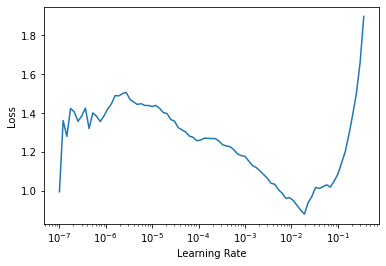

In [11]:
learn.lr_find()

In [26]:
preds = [learn.predict(test_data['fname'].iloc[i]) for i in range(test_data.shape[0])]

In [27]:
real_preds = [int(pred[0]) for pred in preds]

In [29]:
preds


[('0', tensor(0), tensor([1.0000e+00, 1.5922e-06])),
 ('0', tensor(0), tensor([9.9999e-01, 6.7350e-06])),
 ('0', tensor(0), tensor([9.9999e-01, 9.8801e-06])),
 ('0', tensor(0), tensor([1.0000e+00, 2.3415e-06])),
 ('0', tensor(0), tensor([9.9998e-01, 2.0316e-05])),
 ('0', tensor(0), tensor([1.0000e+00, 6.8242e-09])),
 ('0', tensor(0), tensor([1.0000e+00, 1.2546e-07])),
 ('0', tensor(0), tensor([1.0000e+00, 1.6448e-06])),
 ('0', tensor(0), tensor([1.0000e+00, 2.8203e-06])),
 ('0', tensor(0), tensor([1.0000e+00, 2.9626e-06])),
 ('0', tensor(0), tensor([0.8660, 0.1340])),
 ('0', tensor(0), tensor([0.7482, 0.2518])),
 ('0', tensor(0), tensor([0.8198, 0.1802])),
 ('0', tensor(0), tensor([0.9817, 0.0183])),
 ('0', tensor(0), tensor([0.8206, 0.1794])),
 ('0', tensor(0), tensor([0.7541, 0.2459])),
 ('1', tensor(1), tensor([0.2996, 0.7004])),
 ('1', tensor(1), tensor([0.3755, 0.6245])),
 ('0', tensor(0), tensor([0.8812, 0.1188])),
 ('0', tensor(0), tensor([0.6180, 0.3820])),
 ('1', tensor(1), te

In [28]:
accuracy_score(test_data['labels'].values, np.array(real_preds))

0.9333333333333333

In [ ]:
# note the id of the patients in the test set
test_data['id'].unique()